<a href="https://colab.research.google.com/github/NguyenHan243/ANN/blob/main/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
x_train=x_train.reshape(60000,28*28)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28*28)
x_test=x_test.astype('float32')/255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
x_valid,x_train=x_train[:5000]/255.0,x_train[5000:]/255.0
y_valid,y_train=y_train[:5000],y_train[5000:]

In [ ]:
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_acc}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.6177 - loss: 1.0519 - val_accuracy: 0.8205 - val_loss: 0.4923
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8013 - loss: 0.5600 - val_accuracy: 0.8307 - val_loss: 0.4497
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8232 - loss: 0.5063 - val_accuracy: 0.8440 - val_loss: 0.4220
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8364 - loss: 0.4652 - val_accuracy: 0.8533 - val_loss: 0.4046
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8389 - loss: 0.4530 - val_accuracy: 0.8561 - val_loss: 0.3928
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8463 - loss: 0.4361 - val_accuracy: 0.8630 - val_loss: 0.3782
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8499 - loss: 0.4239 - val_accuracy: 0.8661 - val_loss: 0.3743
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8527 - loss: 0

In [167]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = cv2.bitwise_not(img)
    img = img.astype("float32") / 255.0
    img = img.flatten()
    return img
def predict_clothing(image_path):
    processed_img = preprocess_image(image_path)
    processed_img = processed_img.reshape(1,784)
    prediction = model.predict(processed_img)
    predicted_clothing = np.argmax(prediction)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted clothing: {predicted_clothing}")
    plt.axis("off")
    plt.show()
    return predicted_clothing

In [ ]:
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_name[np.argmax(y_train[4])]

'Ankle boot'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


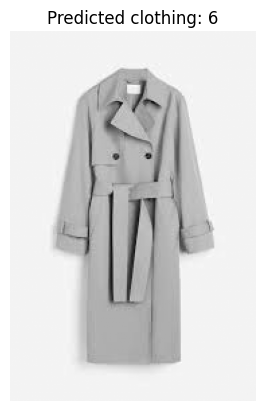

Predicted clothing: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


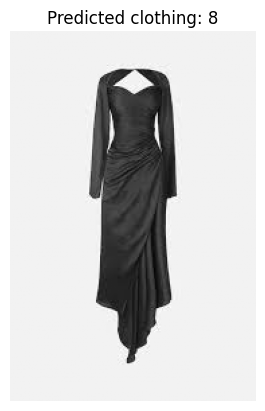

Predicted clothing: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


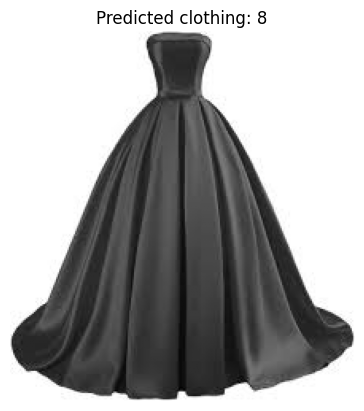

Predicted clothing: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


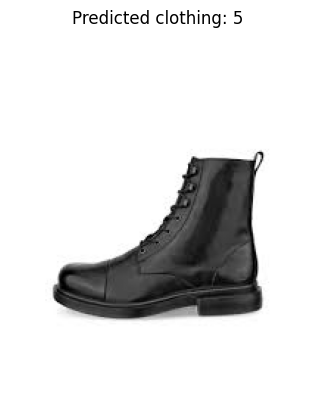

Predicted clothing: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


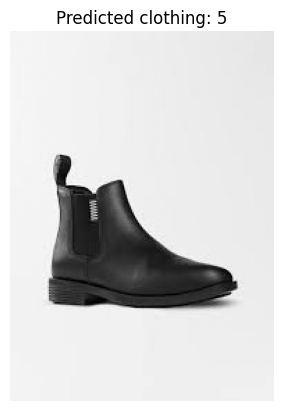

Predicted clothing: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


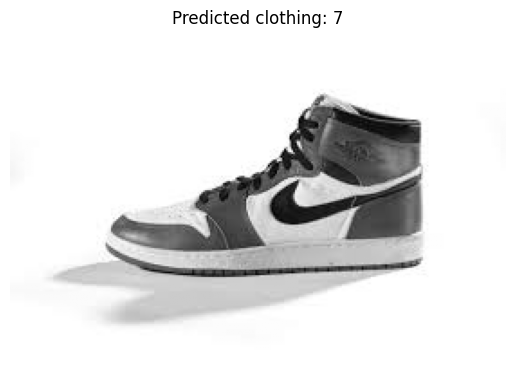

Predicted clothing: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


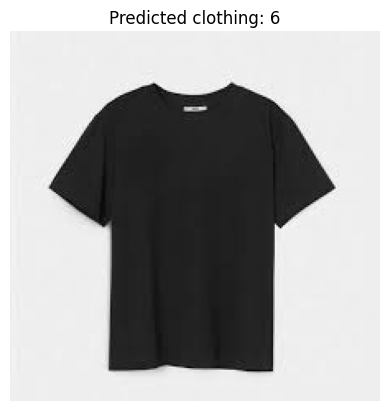

Predicted clothing: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


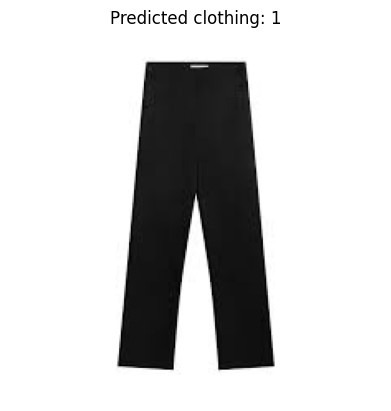

Predicted clothing: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


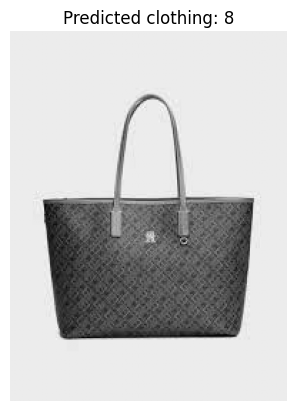

Predicted clothing: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


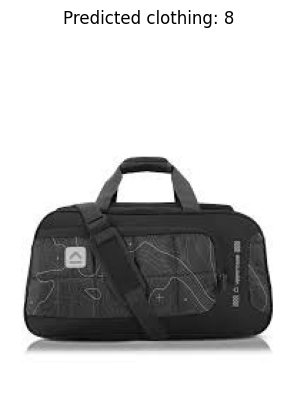

Predicted clothing: 8


In [168]:
image_path = ["/content/coat-4.jfif",'/content/dress-3.jfif','/content/dress.jfif','/content/bo3.jfif','/content/bo7.jfif','/content/sneakers.jfif','/content/t-shirt.jfif','/content/trouser.jfif','/content/b7.jfif','/content/bag-3.jfif']
for image_path in image_path:
    predicted_clothing = predict_clothing(image_path)
    print(f"Predicted clothing: {predicted_clothing}")